Logistic Regression Project Exercise
Data
This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

**age**
**sex**
**chest pain type (4 values)**
**resting blood pressure**
**serum cholestoral in mg/dl**
**fasting blood sugar > 120 mg/dl**
**resting electrocardiographic results (values 0,1,2)**
**maximum heart rate achieved**
**exercise induced angina**
**oldpeak** = ST depression induced by exercise relative to rest


the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target:0 for no presence of heart disease, 1 for presence of heart disease
Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Exploratory Data Analysis and Visualization
Perform EDA and explain each graph



**Visualization Tasks**

TASK: Create a bar plot that shows the total counts per target value.


TASK: Create a pairplot that displays the relationships between the following columns:


TASK: Create a heatmap that displays the correlation between all the columns.


Modeling Task
Train | Test Split and Scaling
TASK: Separate the features from the labels into 2 objects, X and y.

TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.

TASK: Create a StandardScaler object and normalize the X train and test set feature data.

Logistic Regression Model
TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use LogisticRegressionCV OR use a combination of LogisticRegression and GridSearchCV. The choice is up to you.

TASK: Report back your search's optimal parameters, specifically the C value.

Note: You may get a different value than what is shown here depending on how you conducted your search.

Coeffecients
TASK: Report back the model's coefficients.

Task: Create a visualization of the coefficients.

Model Performance Evaluation
TASK: Evaluate your model on the remaining 5% of the data, the test set.

TASK: Create the following evaluations:

Confusion Matrix Array
Confusion Matrix Plot
Classification Report
Performance Curves
TASK: Create both the precision recall curve and the ROC Curve.

In [ ]:
pip install ucimlrepo


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
path="/content/heart_disease.xlsx"
df=pd.read_excel(path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

**VISUALIZATION TASK**

**TASK: Create a bar plot that shows the total counts per target value.**

Text(0.5, 1.0, 'count per target value')

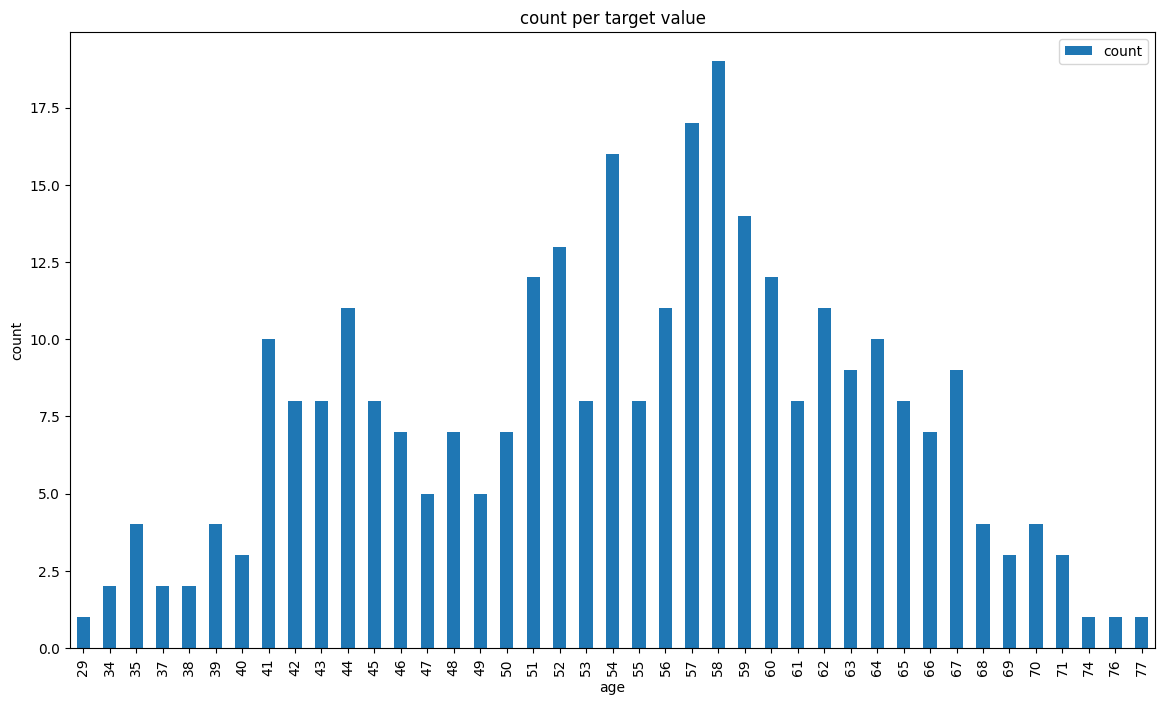

In [ ]:
bar_df = df['age'].value_counts().to_frame('count').reset_index()

bar_df = bar_df.sort_values('age')

bar_df.plot.bar(x='age', figsize=(14,8))

plt.xlabel('age')

plt.ylabel('count')

plt.title('count per target value of age')

Text(0.5, 1.0, 'count per target value of sex')

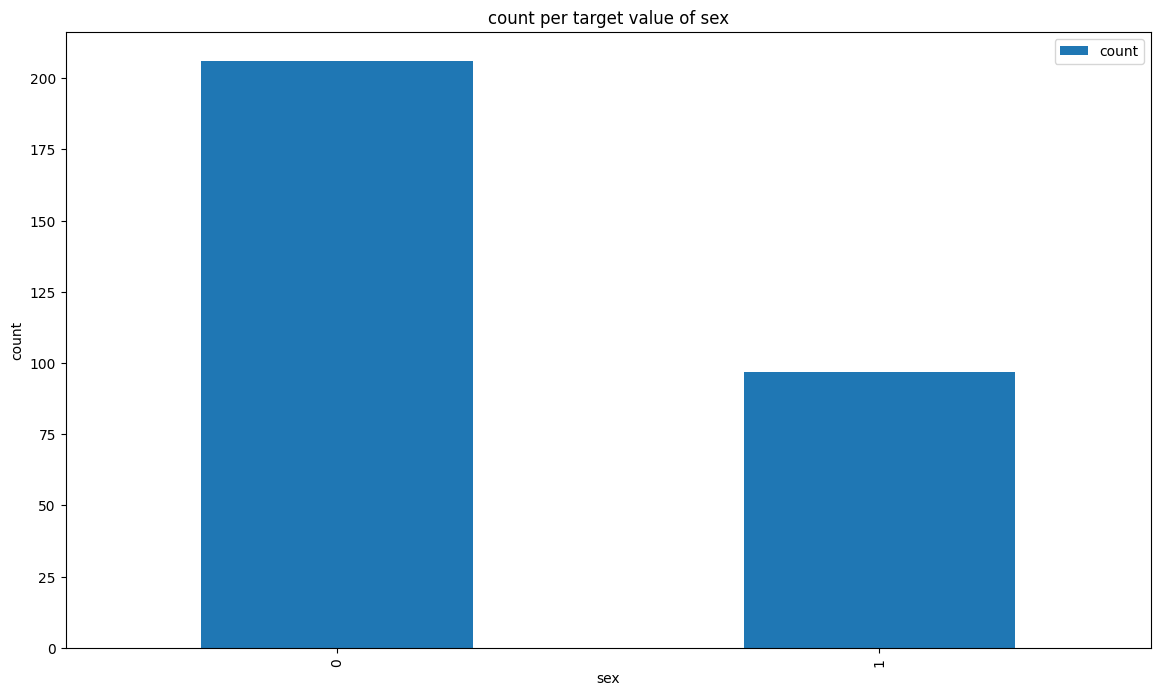

In [ ]:
bar_df = df['sex'].value_counts().to_frame('count').reset_index()

bar_df = bar_df.sort_values('sex')

bar_df.plot.bar(x='sex', figsize=(14,8))

plt.xlabel('sex')

plt.ylabel('count')

plt.title('count per target value of sex')

Text(0.5, 1.0, 'count per target value of cp')

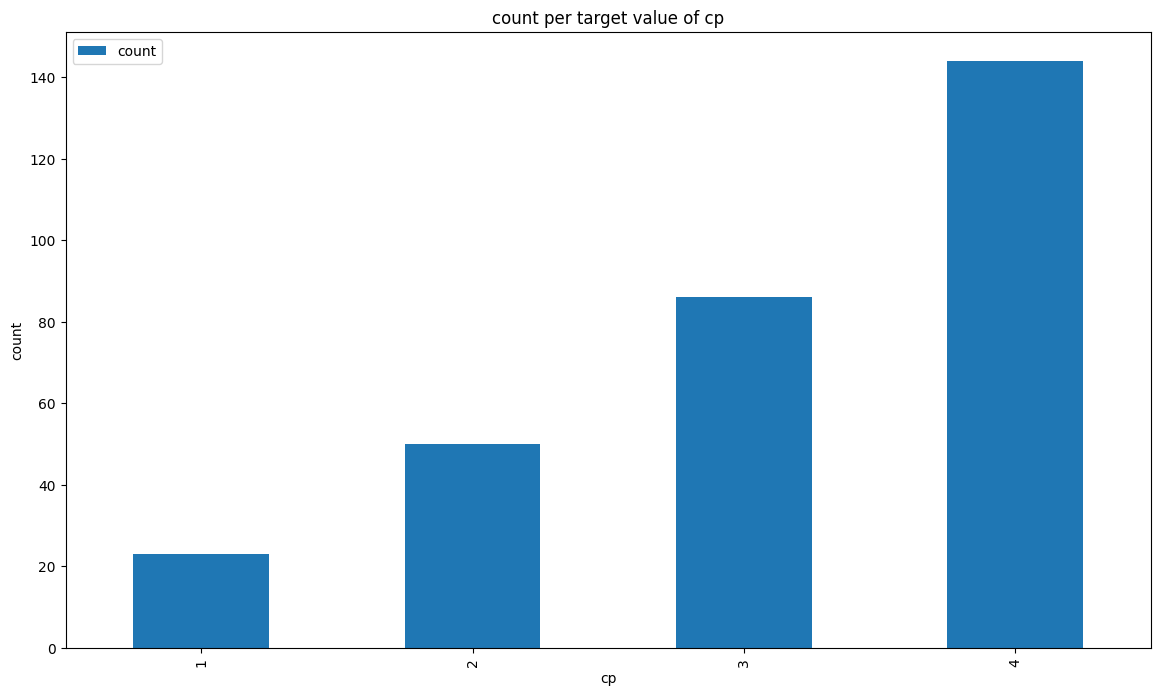

In [ ]:
bar_df = df['cp'].value_counts().to_frame('count').reset_index()

bar_df = bar_df.sort_values('cp')

bar_df.plot.bar(x='cp', figsize=(14,8))

plt.xlabel('cp')

plt.ylabel('count')

plt.title('count per target value of cp')

Text(0.5, 1.0, 'count per target value of trestbps')

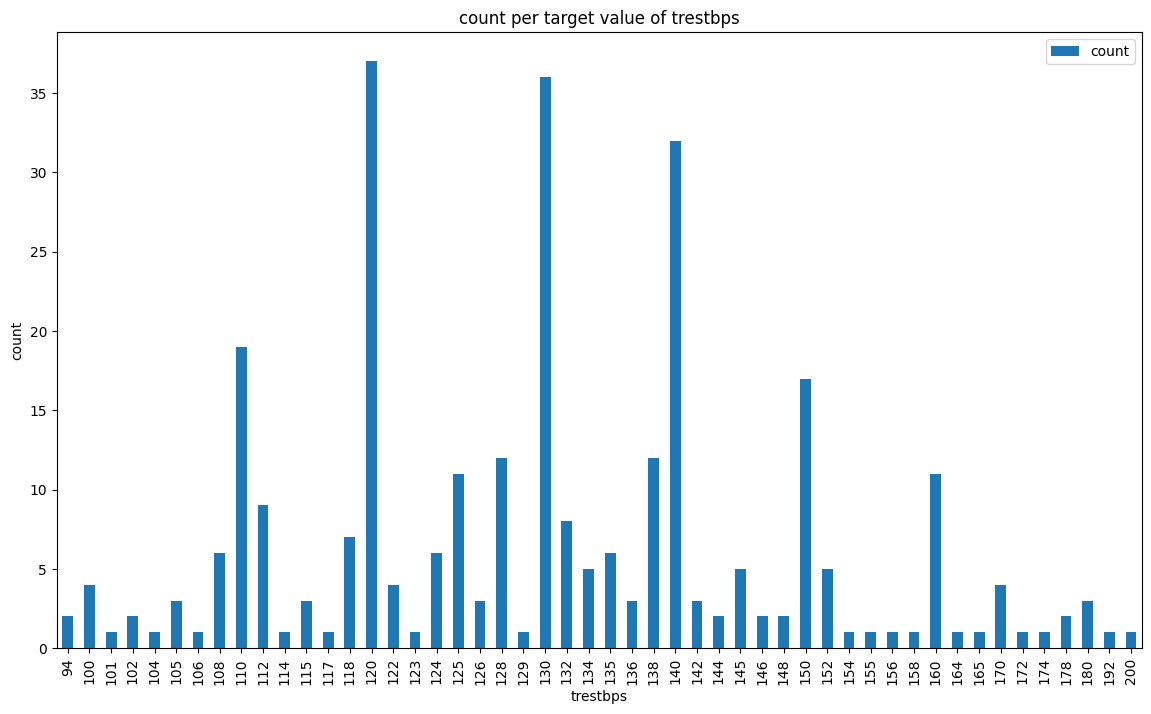

In [ ]:
bar_df = df['trestbps'].value_counts().to_frame('count').reset_index()

bar_df = bar_df.sort_values('trestbps')

bar_df.plot.bar(x='trestbps', figsize=(14,8))

plt.xlabel('trestbps')

plt.ylabel('count')

plt.title('count per target value of trestbps')

Text(0.5, 1.0, 'count per target value of chol')

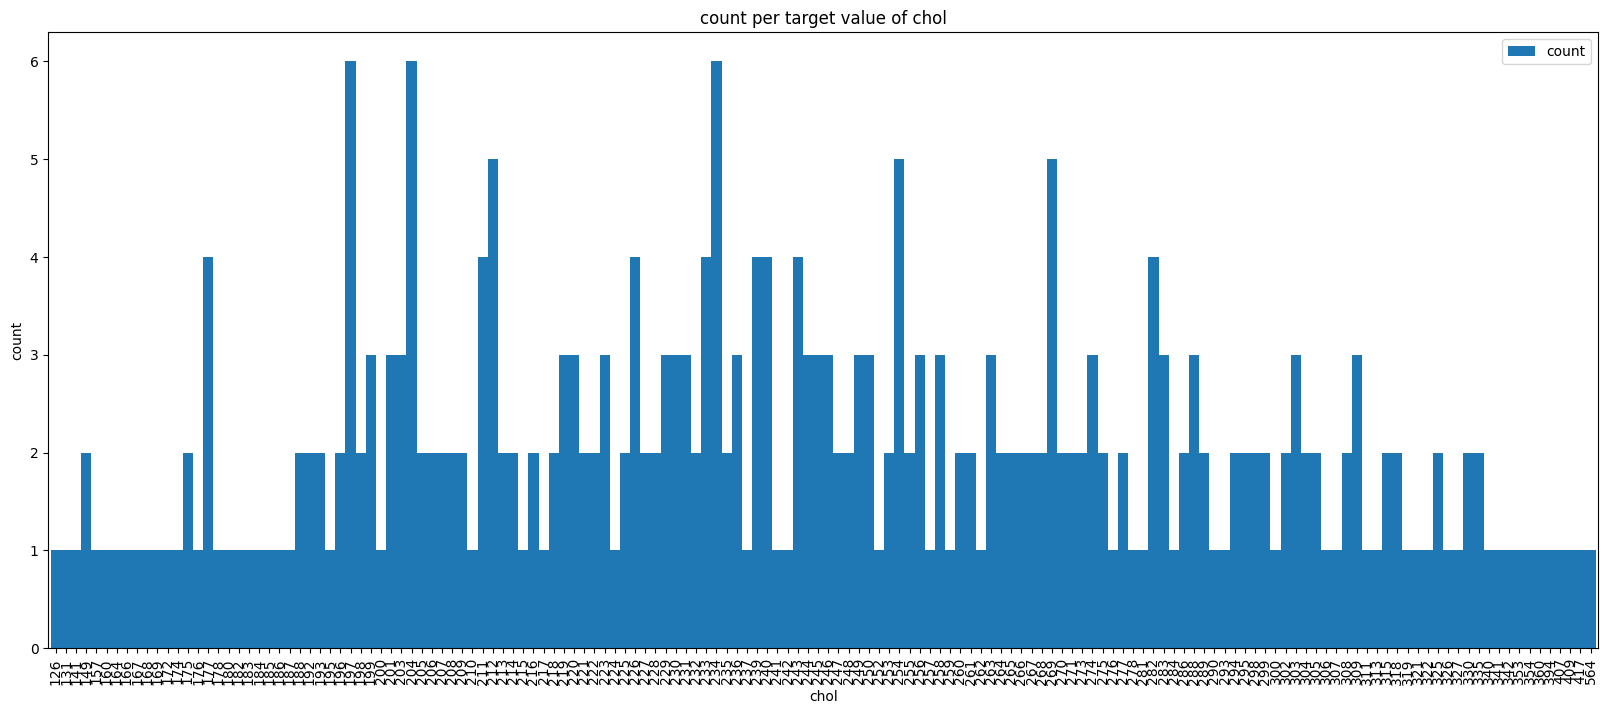

In [ ]:
bar_df = df['chol'].value_counts().to_frame('count').reset_index()

bar_df = bar_df.sort_values('chol')

bar_df.plot.bar(x='chol', figsize=(20,8))

plt.xlabel('chol')

plt.ylabel('count')

plt.title('count per target value of chol')

Text(0.5, 1.0, 'count per target value of fbs')

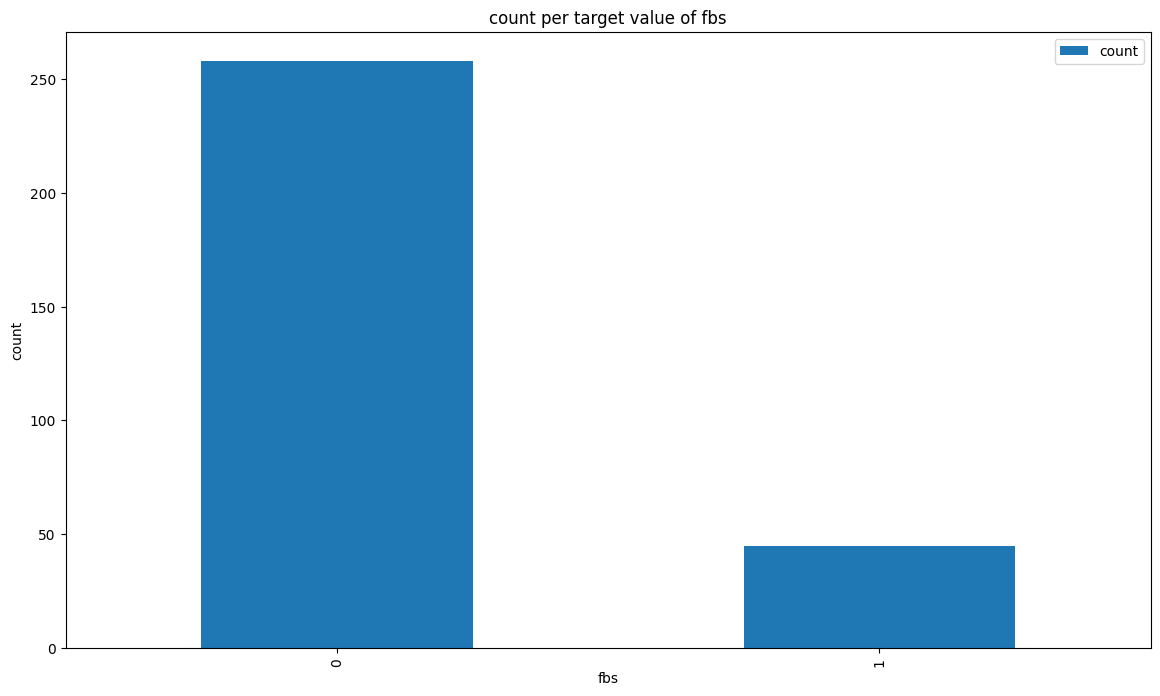

In [ ]:
bar_df = df['fbs'].value_counts().to_frame('count').reset_index()

bar_df = bar_df.sort_values('fbs')

bar_df.plot.bar(x='fbs', figsize=(14,8))

plt.xlabel('fbs')

plt.ylabel('count')

plt.title('count per target value of fbs')

Text(0.5, 1.0, 'count per target value of fbs')

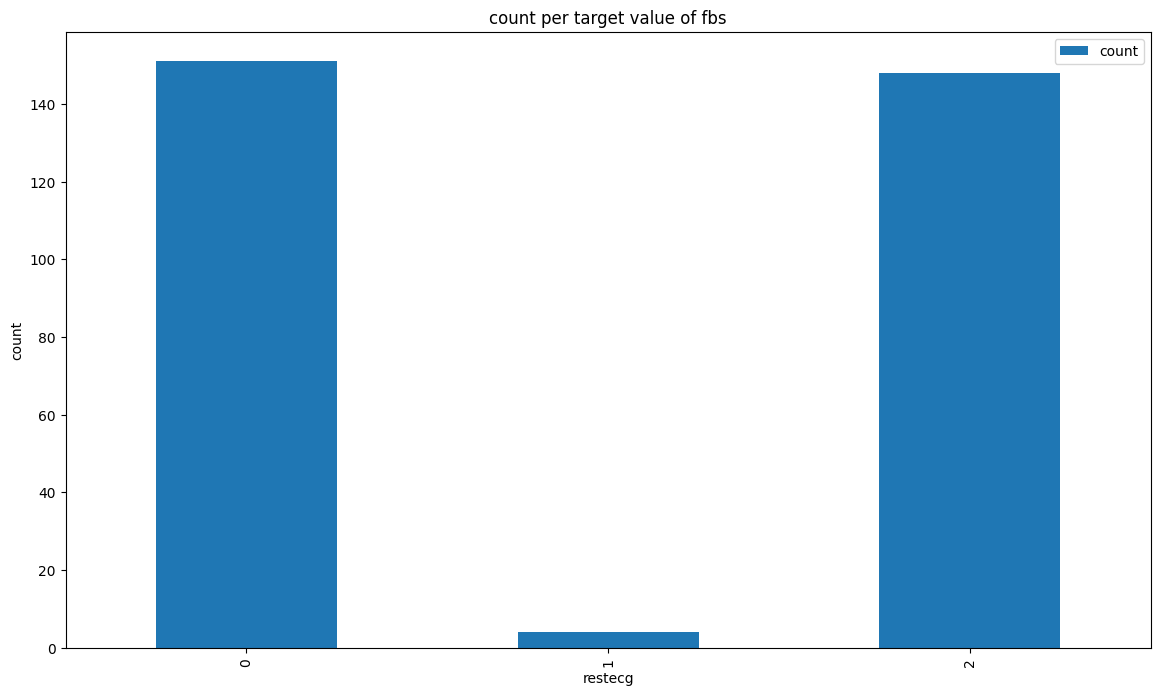

In [ ]:
bar_df = df['restecg'].value_counts().to_frame('count').reset_index()

bar_df = bar_df.sort_values('restecg')

bar_df.plot.bar(x='restecg', figsize=(14,8))

plt.xlabel('restecg')

plt.ylabel('count')

plt.title('count per target value of fbs')